## Summary

We will use [airbnb-listings](https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?flg=fr-fr&disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.city=Paris) for Paris, France

In [31]:
#Chargement des packages et modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.datasets import fetch_california_housing, fetch_openml, load_boston, load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

import pickle

In [32]:
os.getcwd()

'C:\\Users\\Acer\\Desktop\\SEP\\mon_travail_projetdigit'

In [33]:
#Chargez le fichier de données dans un objet appelé "data"

data =pd.read_csv('airbnb-listings.csv', delimiter=";")

C:\Users\Acer\AppData\Local\Temp\ipykernel_2240\502575558.py:3: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('airbnb-listings.csv', delimiter=";")


In [34]:
df_airbnb = data.copy()
df_airbnb.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,7713011,https://www.airbnb.com/rooms/7713011,20170404145355,2017-04-06,STUDIO PIGALLE W BALCONY,"In the heart of Montmarte Pigalle, this lovely...",This newly refurbished flat is ideal for a cou...,"In the heart of Montmarte Pigalle, this lovely...",none,It is central enough for you to walk your way ...,...,9.0,8.0,9.0,NaN,Paris,strict,7,1.84,"48.88292573377615, 2.3358125139068453","Host Has Profile Pic,Host Identity Verified,Is..."
1,3335054,https://www.airbnb.com/rooms/3335054,20170404145355,2017-04-05,Montmartre au pied du Sacré-Coeur !,"Ce studio de 22m2, rénové et équipé avec soin,...",A studio where it is very pleasant to settle i...,A studio where it is very pleasant to settle i...,none,The apartment is located rue d'Orsel just belo...,...,10.0,10.0,10.0,NaN,Paris,moderate,1,0.03,"48.88301302713629, 2.343468625865973","Host Has Profile Pic,Host Identity Verified,Is..."
2,10066518,https://www.airbnb.com/rooms/10066518,20170404145355,2017-04-06,LOVELY FLAT MONTMARTRE SACRE COEUR,In 2' by walk of the Sacré-Coeur and the Mouli...,Charmant appartement typiquement parisien avec...,In 2' by walk of the Sacré-Coeur and the Mouli...,none,"Situé en plein quartier Montmartre, vous serez...",...,10.0,10.0,10.0,NaN,Paris,moderate,2,0.89,"48.884043258037266, 2.3406044314802927","Host Has Profile Pic,Host Identity Verified,Is..."
3,8100080,https://www.airbnb.com/rooms/8100080,20170404145355,2017-04-06,Appartement au pied de Montmartre,"Dans un appartement de 50m², à deux minutes du...",NaN,"Dans un appartement de 50m², à deux minutes du...",none,NaN,...,10.0,10.0,9.0,NaN,Paris,flexible,1,0.17,"48.88519518071742, 2.3451007362886185","Host Has Profile Pic,Host Identity Verified,Is..."
4,7397323,https://www.airbnb.com/rooms/7397323,20170404145355,2017-04-06,Beautiful and Spacious Studio,Grd studio lumineux de 32m² avec une grande pi...,NaN,Grd studio lumineux de 32m² avec une grande pi...,none,NaN,...,10.0,8.0,10.0,NaN,Paris,flexible,1,0.11,"48.89480043872107, 2.3300554723388434",Host Has Profile Pic


In [35]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54513 entries, 0 to 54512
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              54513 non-null  int64  
 1   Listing Url                     54513 non-null  object 
 2   Scrape ID                       54513 non-null  int64  
 3   Last Scraped                    54513 non-null  object 
 4   Name                            54510 non-null  object 
 5   Summary                         52368 non-null  object 
 6   Space                           37975 non-null  object 
 7   Description                     54506 non-null  object 
 8   Experiences Offered             54513 non-null  object 
 9   Neighborhood Overview           32669 non-null  object 
 10  Notes                           17480 non-null  object 
 11  Transit                         35008 non-null  object 
 12  Access                          

<h3> PREPROCESSING</h3>

In [36]:
#Transformer les variables de manière à supprimer les espaces et convertir en minuscules

def transformer_variables(nom_variable):
    # Supprimer les espaces et convertir en minuscules
    nom_transforme = nom_variable.lower().replace(' ', '_')
    return nom_transforme

def transformer_colonnes(dataframe):
    # Appliquer la fonction sur toutes les colonnes du DataFrame
    dataframe.columns = dataframe.columns.map(transformer_variables)
    return dataframe

# Appliquer la transformation
df_airbnb = transformer_colonnes(df_airbnb)


print(df_airbnb)


             id                            listing_url       scrape_id  \
0       7713011   https://www.airbnb.com/rooms/7713011  20170404145355   
1       3335054   https://www.airbnb.com/rooms/3335054  20170404145355   
2      10066518  https://www.airbnb.com/rooms/10066518  20170404145355   
3       8100080   https://www.airbnb.com/rooms/8100080  20170404145355   
4       7397323   https://www.airbnb.com/rooms/7397323  20170404145355   
...         ...                                    ...             ...   
54508   5504201   https://www.airbnb.com/rooms/5504201  20170404145355   
54509    539454    https://www.airbnb.com/rooms/539454  20170404145355   
54510  16661271  https://www.airbnb.com/rooms/16661271  20170404145355   
54511   6698800   https://www.airbnb.com/rooms/6698800  20170404145355   
54512   7219797   https://www.airbnb.com/rooms/7219797  20170404145355   

      last_scraped                                         name  \
0       2017-04-06                     STUDI

In [37]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54513 entries, 0 to 54512
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              54513 non-null  int64  
 1   listing_url                     54513 non-null  object 
 2   scrape_id                       54513 non-null  int64  
 3   last_scraped                    54513 non-null  object 
 4   name                            54510 non-null  object 
 5   summary                         52368 non-null  object 
 6   space                           37975 non-null  object 
 7   description                     54506 non-null  object 
 8   experiences_offered             54513 non-null  object 
 9   neighborhood_overview           32669 non-null  object 
 10  notes                           17480 non-null  object 
 11  transit                         35008 non-null  object 
 12  access                          

In [38]:
df_airbnb['country'].value_counts()

France         54512
Switzerland        1
Name: country, dtype: int64

In [39]:
df_airbnb["amenities"]


0        TV,Cable TV,Internet,Wireless Internet,Kitchen...
1        Cable TV,Wireless Internet,Kitchen,Elevator in...
2        Internet,Wireless Internet,Kitchen,Indoor fire...
3        TV,Internet,Wireless Internet,Kitchen,Smoking ...
4        TV,Internet,Wireless Internet,Kitchen,Elevator...
                               ...                        
54508    TV,Internet,Wireless Internet,Kitchen,Elevator...
54509    TV,Internet,Wireless Internet,Kitchen,Smoking ...
54510    TV,Internet,Wireless Internet,Kitchen,Elevator...
54511                                                  NaN
54512    Internet,Wireless Internet,Kitchen,Elevator in...
Name: amenities, Length: 54513, dtype: object

In [40]:
df_airbnb.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  3
                                  ...  
cancellation_policy                   0
calculated_host_listings_count        0
reviews_per_month                 13465
geolocation                           0
features                             18
Length: 89, dtype: int64

In [41]:
df_airbnb.price

0         80.0
1         65.0
2         41.0
3         50.0
4         60.0
         ...  
54508    140.0
54509     90.0
54510     89.0
54511     50.0
54512     45.0
Name: price, Length: 54513, dtype: float64

In [42]:
# Afficher les statistiques descriptives de la variable 'price'
print(df_airbnb['price'].describe())

count    54459.000000
mean        94.787418
std         73.357710
min          0.000000
25%         55.000000
50%         75.000000
75%        107.000000
max        999.000000
Name: price, dtype: float64


In [43]:
#verifier s'il ya des valeurs manquantes
df_airbnb['price'].isna().sum()

54

In [44]:
#Verifier s'il existe des doublons
df_airbnb.loc[df_airbnb['id'].duplicated(keep=False), :]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,geolocation,features


In [47]:
# Remplacer les valeurs manquantes par la médiane du prix par type de logement

def remplacer_par_mediane(dataframe, colonne, groupe_colonne):
    # Calculer la médiane par groupe
    medianes_par_groupe = dataframe.groupby(groupe_colonne)[colonne].median()

    # Remplacer les valeurs manquantes par la médiane correspondante
    dataframe[colonne] = dataframe.apply(
        lambda row: medianes_par_groupe[row[groupe_colonne]] if pd.isnull(row[colonne]) else row[colonne],
        axis=1
    )

# Appliquer la fonction pour remplacer les valeurs manquantes par la médiane par type de logement
remplacer_par_mediane(df_airbnb, 'price', 'room_type')

# Afficher le DataFrame après la transformation
print(df_airbnb)


             id                            listing_url       scrape_id  \
0       7713011   https://www.airbnb.com/rooms/7713011  20170404145355   
1       3335054   https://www.airbnb.com/rooms/3335054  20170404145355   
2      10066518  https://www.airbnb.com/rooms/10066518  20170404145355   
3       8100080   https://www.airbnb.com/rooms/8100080  20170404145355   
4       7397323   https://www.airbnb.com/rooms/7397323  20170404145355   
...         ...                                    ...             ...   
54508   5504201   https://www.airbnb.com/rooms/5504201  20170404145355   
54509    539454    https://www.airbnb.com/rooms/539454  20170404145355   
54510  16661271  https://www.airbnb.com/rooms/16661271  20170404145355   
54511   6698800   https://www.airbnb.com/rooms/6698800  20170404145355   
54512   7219797   https://www.airbnb.com/rooms/7219797  20170404145355   

      last_scraped                                         name  \
0       2017-04-06                     STUDI

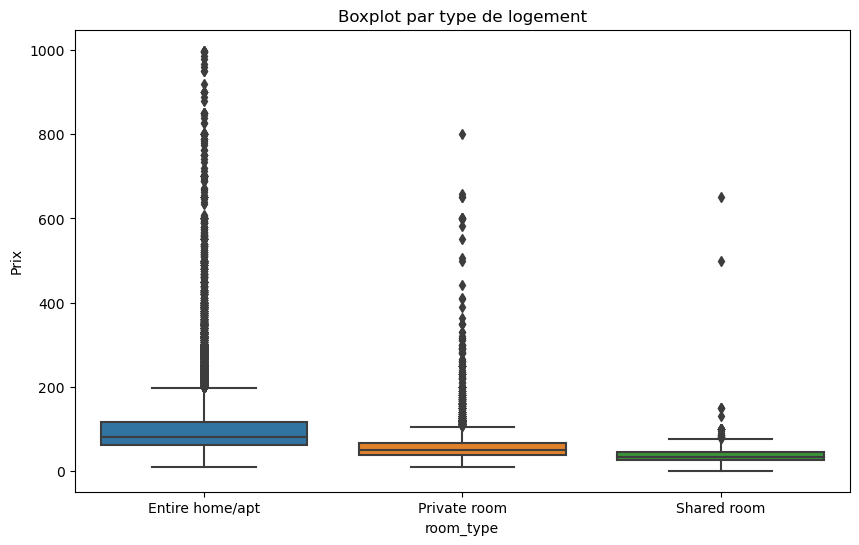

In [48]:
# Créer un boxplot
import seaborn as sns  # Importation de seaborn pour des options de style supplémentaires


plt.figure(figsize=(10, 6))  # Spécifiez la taille de la figure (largeur, hauteur)

# Utilisez seaborn pour améliorer le style du boxplot
sns.boxplot(data=df_airbnb, x='room_type', y='price')  # showfliers=False pour ne pas afficher les valeurs aberrantes

plt.title('Boxplot par type de logement')
plt.ylabel('Prix')
plt.show()

In [49]:
#correction des valeurs extrêmes de price par la méthode des quartiles


def calculer_quartiles_par_groupe(dataframe, variable_groupe, variable_quartile, quartiles=[0.25, 0.5, 0.75]):
    """
    Calcule les quartiles par groupe pour une variable spécifique.

    Paramètres :
    - dataframe : DataFrame pandas
    - variable_groupe : Nom de la colonne utilisée pour diviser le DataFrame en groupes
    - variable_quartile : Nom de la colonne pour laquelle calculer les quartiles
    - quartiles : Liste des quartiles à calculer (par défaut : [0.25, 0.5, 0.75])

    Retourne :
    - DataFrame contenant les quartiles par groupe
    """
    groupes = dataframe.groupby(variable_groupe)
    quartiles_par_groupe = groupes[variable_quartile].quantile(quartiles).unstack()
    return quartiles_par_groupe

# Exemple d'utilisation
df_quartiles = calculer_quartiles_par_groupe(df_airbnb, 'room_type', 'price')
print("Quartiles par groupe de room_type :")
print(df_quartiles)



Quartiles par groupe de room_type :
                 0.25  0.50   0.75
room_type                         
Entire home/apt  60.0  80.0  115.0
Private room     38.0  50.0   65.0
Shared room      25.0  32.0   45.0


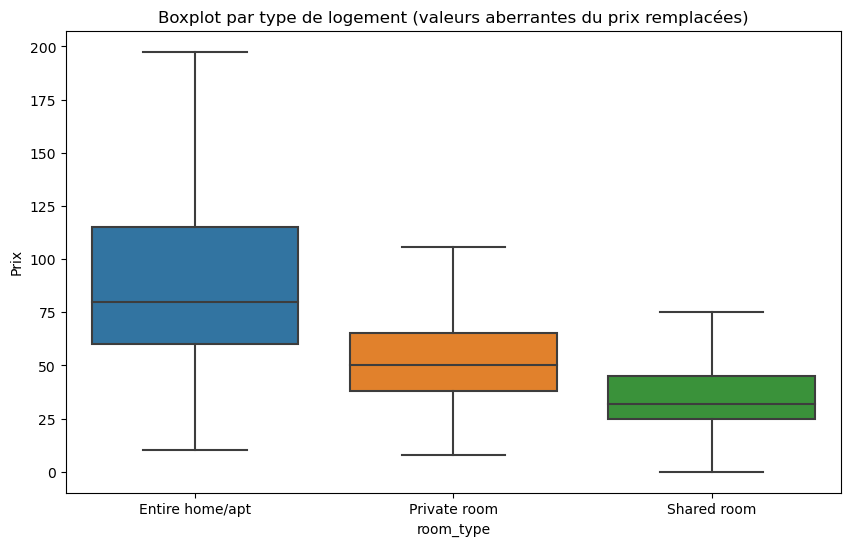

In [50]:
def remplacer_valeurs_aberrantes(dataframe, variable_quartile, variable_groupe, seuil=1.5):
    """
    Remplace les valeurs aberrantes par les valeurs quartiles les plus proches.

    Paramètres :
    - dataframe : DataFrame pandas
    - variable_quartile : Nom de la colonne pour laquelle calculer les quartiles
    - variable_groupe : Nom de la colonne utilisée pour diviser le DataFrame en groupes
    - seuil : Facteur multiplicatif pour déterminer les valeurs aberrantes (par défaut : 1.5)

    Retourne :
    - DataFrame avec les valeurs aberrantes remplacées
    """
    groupes = dataframe.groupby(variable_groupe)
    
    # Calculer les quartiles pour chaque groupe
    quartiles_par_groupe = groupes[variable_quartile].quantile([0.25, 0.5, 0.75]).unstack()

    # Remplacer les valeurs aberrantes
    def remplacer_aberrantes(groupe):
        Q1 = quartiles_par_groupe.loc[groupe.name, 0.25]
        Q3 = quartiles_par_groupe.loc[groupe.name, 0.75]
        IQR = Q3 - Q1
        borne_inf = Q1 - seuil * IQR
        borne_sup = Q3 + seuil * IQR
        groupe[variable_quartile] = groupe[variable_quartile].apply(lambda x: borne_inf if x < borne_inf else (borne_sup if x > borne_sup else x))
        return groupe

    dataframe = groupes.apply(remplacer_aberrantes)

    return dataframe

# Exemple d'utilisation
df_airbnb = remplacer_valeurs_aberrantes(df_airbnb, 'price', 'room_type')

# Créer un boxplot après le remplacement des valeurs aberrantes


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb, x='room_type', y='price')
plt.title('Boxplot par type de logement (valeurs aberrantes du prix remplacées)')
plt.ylabel('Prix')
plt.show()


#### Variables pouvant expliquer le prix d'un airbnb

- Nombre de chambres (bedrooms)
- Nombre de salles de bains (bathrooms)
- Capacité d'accueil (accommodates)
- Type de logement (entire home, private room, shared room, etc.)
- Quartier (neighbourhood)
- Équipements (amenities)
- Distance par rapport aux attractions touristiques ou au centre-ville
- Nombre minimal de nuits (minimum nights)
- Disponibilité du logement (availability)

In [51]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54513 entries, 0 to 54512
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              54513 non-null  int64  
 1   listing_url                     54513 non-null  object 
 2   scrape_id                       54513 non-null  int64  
 3   last_scraped                    54513 non-null  object 
 4   name                            54510 non-null  object 
 5   summary                         52368 non-null  object 
 6   space                           37975 non-null  object 
 7   description                     54506 non-null  object 
 8   experiences_offered             54513 non-null  object 
 9   neighborhood_overview           32669 non-null  object 
 10  notes                           17480 non-null  object 
 11  transit                         35008 non-null  object 
 12  access                          

In [52]:
X = df_airbnb[[ 'neighbourhood_cleansed','room_type','accommodates','bedrooms','bathrooms','bed_type','minimum_nights', 'availability_365']]
X

,neighbourhood_cleansed,room_type,accommodates,bedrooms,bathrooms,bed_type,minimum_nights,availability_365
0,Buttes-Montmartre,Entire home/apt,2,0.0,1.0,Real Bed,4,285
1,Buttes-Montmartre,Entire home/apt,2,0.0,1.0,Pull-out Sofa,3,0
2,Buttes-Montmartre,Entire home/apt,2,1.0,1.0,Real Bed,2,5
3,Buttes-Montmartre,Private room,2,1.0,1.0,Real Bed,2,360
4,Buttes-Montmartre,Entire home/apt,2,0.0,1.0,Pull-out Sofa,2,363
...,...,...,...,...,...,...,...,...
54508,Buttes-Montmartre,Entire home/apt,4,2.0,1.0,Real Bed,1,365
54509,Buttes-Montmartre,Entire home/apt,4,1.0,1.0,Real Bed,3,0
54510,Buttes-Montmartre,Entire home/apt,6,2.0,1.0,Real Bed,2,338
54511,Buttes-Montmartre,Entire home/apt,1,1.0,1.0,Real Bed,1,0


In [53]:
X.describe()

,accommodates,bedrooms,bathrooms,minimum_nights,availability_365
count,54513.000000,54379.000000,54329.000000,54513.000000,54513.000000
mean,3.034506,1.054267,1.093219,3.727276,146.355053
std,1.477910,0.795793,0.379980,61.513684,141.272204
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,2.000000,94.000000
75%,4.000000,1.000000,1.000000,3.000000,293.000000
max,16.000000,10.000000,8.000000,10000.000000,365.000000


In [54]:
X.loc[X['minimum_nights']>365, :]

,neighbourhood_cleansed,room_type,accommodates,bedrooms,bathrooms,bed_type,minimum_nights,availability_365
15246,Palais-Bourbon,Entire home/apt,4,1.0,1.0,Real Bed,10000,58
22958,Reuilly,Entire home/apt,2,0.0,1.0,Real Bed,1000,88
45529,Buttes-Chaumont,Entire home/apt,3,0.0,1.0,Real Bed,1000,178
47071,Buttes-Montmartre,Entire home/apt,4,1.0,1.0,Real Bed,999,363
48547,Reuilly,Private room,2,1.0,1.0,Real Bed,9999,364


In [55]:
###variables qualitatives et quantitaitve
categorical_features = X.select_dtypes(include="object").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = X.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['neighbourhood_cleansed', 'room_type', 'bed_type'], dtype='object')

Numerical features:
 Index(['accommodates', 'bedrooms', 'bathrooms', 'minimum_nights',
       'availability_365'],
      dtype='object')


In [56]:
# Remplacer les valeurs manquantes dans les variables catégorielles par le mode
X[categorical_features] = X[categorical_features].apply(lambda col: col.fillna(col.mode()[0]))

# Remplacer les valeurs manquantes dans les variables numériques par la médiane
X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.median()))

# Affichage du DataFrame avec les valeurs manquantes remplacées
X.isna().sum()/X.shape[0]*100 

C:\Users\Acer\AppData\Local\Temp\ipykernel_2240\1745901578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].apply(lambda col: col.fillna(col.mode()[0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_2240\1745901578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.median()))


neighbourhood_cleansed    0.0
room_type                 0.0
accommodates              0.0
bedrooms                  0.0
bathrooms                 0.0
bed_type                  0.0
minimum_nights            0.0
availability_365          0.0
dtype: float64

In [57]:
#definition de la variable d'intérêt
y=df_airbnb['price']
y.describe()

count    54513.000000
mean        87.349660
std         45.555036
min          0.000000
25%         55.000000
50%         75.000000
75%        105.500000
max        197.500000
Name: price, dtype: float64

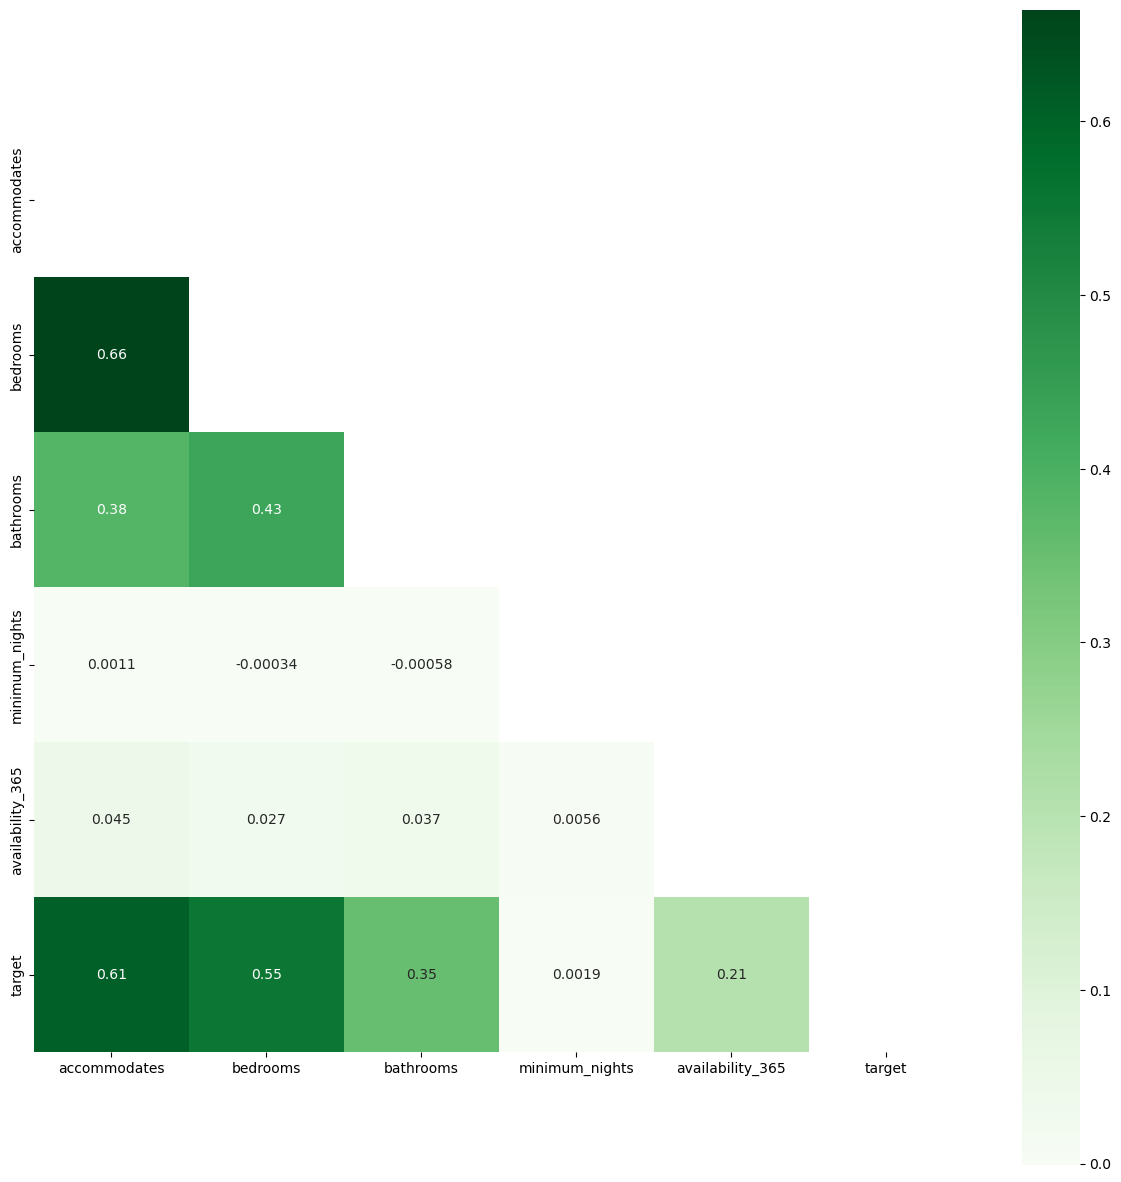

In [58]:
# correlation plot
plt.figure(figsize=(15, 15))
corr = X[numerical_features].assign(target=y).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True, mask=mask, cbar=True, vmin=None, vmax=None);

<h3> REGRESSION LINEAIRE</h3>

In [59]:
categorical_transformer = make_pipeline(*[SimpleImputer(strategy='most_frequent'),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", StandardScaler())]
                              )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.


reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['accommodates', 'bedrooms', 'bathrooms', 'minimum_nights',
       'availability_365'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                               

### Train test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)



### Evaluation du modèle

In [61]:
model_reg= reg.fit(X_train, y_train)

In [62]:
# cross validation only
cv_results = cross_validate(model_reg,
                            X_train, y_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_reg = pd.DataFrame(cv_results)
cv_result_reg

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.148657,0.017241,0.598318,0.596009,-824.021190,-843.369110,-2.825877e-01,-5.760061e+12,-21.490149,-21.573443
1,0.130997,0.017952,0.585574,0.599123,-840.721898,-839.085103,-2.812664e-01,-5.718407e+12,-21.354900,-21.599212
2,0.146809,0.021944,0.592139,0.597619,-861.744713,-833.826739,-2.857928e-01,-5.709601e+12,-21.789452,-21.472089
3,0.152824,0.029061,0.596932,0.596385,-857.202724,-834.955788,-2.332372e+13,-2.823067e-01,-21.828284,-21.465470
4,0.143851,0.022937,0.606726,0.593944,-818.549774,-844.641249,-2.817375e-01,-5.564601e+12,-21.332492,-21.597648


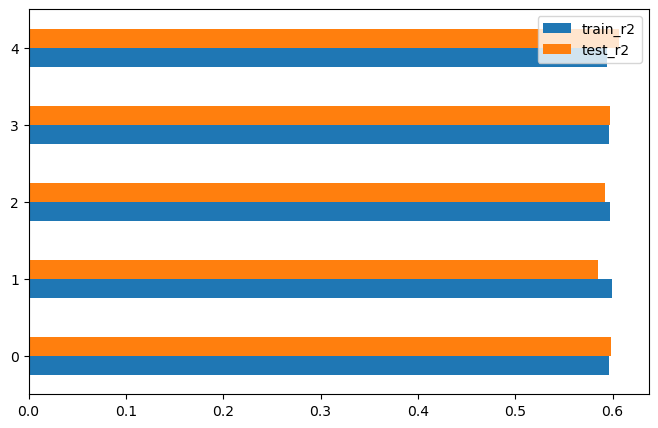

In [63]:
cv_result_reg[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

In [69]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [91]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [92]:
METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_percentage_error,
           max_error,
          ]
# get performance on single set
get_performances(real_value=y_test, estimated_value=y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,0.584352
1,mean_squared_error,854.017982
2,mean_absolute_percentage_error,0.286727
3,max_error,352.379248


In [72]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,5.965592e-01,0.584352
1,mean_squared_error,8.393025e+02,854.017982
2,mean_absolute_percentage_error,4.575712e+12,0.286727
3,max_error,3.039845e+02,352.379248


### Optimisation des hyperparamètres de la régression linéaire

In [73]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median","most_frequent"],
    "regressor__fit_intercept": [True, False],
    "preprocessor__num__scaler": [ StandardScaler(), MinMaxScaler(), RobustScaler()],
}


grid_search = GridSearchCV(reg, param_grid, cv=10, scoring="r2", return_train_score=True) # r2
# you can see the list of key for scoring: sorted(sklearn.metrics.SCORERS.keys())
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['accommodates', 'bedrooms', 'bathrooms', 'minimum_nights',
       'availability_365'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                             

In [74]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

Best params: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler': RobustScaler(), 'regressor__fit_intercept': True}


In [75]:
model_op= grid_search.best_estimator_

In [76]:
model_op.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['accommodates', 'bedrooms', 'bathrooms', 'minimum_nights',
       'availability_365'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(h

In [77]:
y_test_pred2 = model_op.predict(X_test)
y_train_pred2 = model_op.predict(X_train)

In [78]:
print(f"Model score - training data: {model_op.score(X_train, y_train)}")
print(f"Model score - test data: {model_op.score(X_test, y_test)}")

Model score - training data: 0.5965587491754845
Model score - test data: 0.5843477184219945


### Features importances

In [79]:
def get_input_features(model_pipeline, cat_step_name):
    """ Get model feature names used in training
    
    """

    all_feature_names = []

    for step_name, pipe_trans, feat_names in model_pipeline["preprocessor"].transformers_:
        if step_name == cat_step_name:
            all_feature_names.extend(pipe_trans
                                 .named_steps["onehotencoder"]
                                 .get_feature_names(input_features=categorical_features)
                                )
        else:
            all_feature_names.extend(feat_names)
    return all_feature_names

In [97]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

    # Append estimator to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

In [81]:
model_features = get_input_features(model_pipeline=reg, cat_step_name="cat")
model_features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['accommodates',
 'bedrooms',
 'bathrooms',
 'minimum_nights',
 'availability_365',
 'neighbourhood_cleansed_Batignolles-Monceau',
 'neighbourhood_cleansed_Bourse',
 'neighbourhood_cleansed_Buttes-Chaumont',
 'neighbourhood_cleansed_Buttes-Montmartre',
 'neighbourhood_cleansed_Entrepôt',
 'neighbourhood_cleansed_Gobelins',
 'neighbourhood_cleansed_Hôtel-de-Ville',
 'neighbourhood_cleansed_Louvre',
 'neighbourhood_cleansed_Luxembourg',
 'neighbourhood_cleansed_Ménilmontant',
 'neighbourhood_cleansed_Observatoire',
 'neighbourhood_cleansed_Opéra',
 'neighbourhood_cleansed_Palais-Bourbon',
 'neighbourhood_cleansed_Panthéon',
 'neighbourhood_cleansed_Passy',
 'neighbourhood_cleansed_Popincourt',
 'neighbourhood_cleansed_Reuilly',
 'neighbourhood_cleansed_Temple',
 'neighbourhood_cleansed_Vaugirard',
 'neighbourhood_cleansed_Élysée',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-ou

In [82]:
estimateur = reg["regressor"]

df_feature_importance = pd.DataFrame(estimateur.coef_, columns=["coef"], index=model_features)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (33, 1)


,coef
accommodates,12.399888
bedrooms,14.549733
bathrooms,3.326038
minimum_nights,-0.038578
availability_365,7.074140


In [83]:
#f=open('test.sav', 'wb')

In [161]:
#pickle.dump(model,f)

### Modèle RIDGE

In [94]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                       StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="most_frequent"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters= {'alphas': 0.5},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002491E7B9E80>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEnco

In [101]:
model_reg_ridge= reg_ridge.fit(X_train, y_train)

In [102]:
# cross validation only
cv_results = cross_validate(reg_ridge,
                            X_train, y_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_ridge = pd.DataFrame(cv_results)
cv_result_ridge

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.388717,0.017069,0.598315,0.596009,-824.028104,-843.369146,-2.825886e-01,-5.761783e+12,-21.490152,-21.573338
1,0.348357,0.016181,0.585574,0.599123,-840.721438,-839.085140,-2.812627e-01,-5.720289e+12,-21.354746,-21.599105
2,0.341150,0.016349,0.592142,0.597619,-861.738784,-833.826779,-2.857894e-01,-5.711503e+12,-21.789232,-21.472007
3,0.396881,0.016292,0.596931,0.596385,-857.204073,-834.955825,-2.333045e+13,-2.823048e-01,-21.828253,-21.465349
4,0.413176,0.031916,0.606728,0.593944,-818.545552,-844.641287,-2.817343e-01,-5.566621e+12,-21.332329,-21.597540


In [105]:
y_test_pred = reg_ridge.predict(X_test)
y_train_pred = reg_ridge.predict(X_train)

In [106]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,5.965592e-01,0.584351
1,mean_squared_error,8.393025e+02,854.018672
2,mean_absolute_percentage_error,4.576872e+12,0.286726
3,max_error,3.039886e+02,352.388383


In [107]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,5.965592e-01,0.584351
1,mean_squared_error,8.393025e+02,854.018672
2,mean_absolute_percentage_error,4.576872e+12,0.286726
3,max_error,3.039886e+02,352.388383


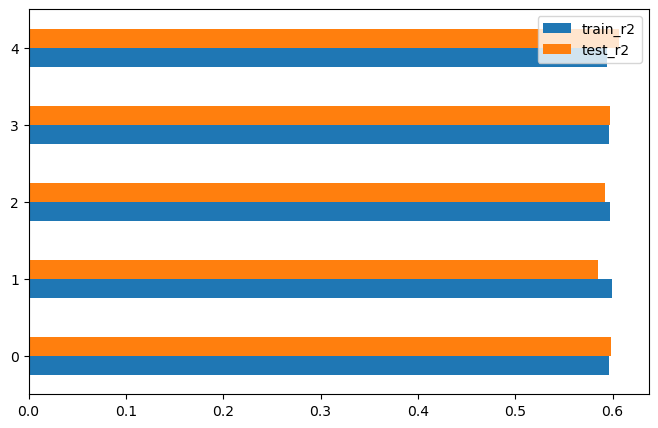

In [108]:
cv_result_ridge[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

### LASSO

In [118]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                       StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="most_frequent"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_lasso = define_pipeline(estimator=Lasso, parameters= {'alpha': 1.0},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000249230309A0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEnco

In [119]:
model_reg_lasso= reg_lasso.fit(X_train, y_train)

In [120]:
y_train_pred = reg_lasso.predict(X_train)
y_test_pred = reg_lasso.predict(X_test)

In [121]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,4.954054e-01,0.483430
1,mean_squared_error,1.049739e+03,1061.377498
2,mean_absolute_percentage_error,3.861590e+12,0.330549
3,max_error,2.995237e+02,369.591330


### XGBOOST

In [122]:
!pip install xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

Defaulting to user installation because normal site-packages is not writeable


In [123]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                       StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="most_frequent"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_xgboost = define_pipeline(estimator=XGBRegressor,
                            parameters={'n_estimators':50,'max_depth':3},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_xgboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000249232762E0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneho...
                              feature_types=None, gamma=None, gpu_id=None,
         

In [124]:
reg_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000249232762E0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneho...
                              feature_types=None, gamma=None, gpu_id=None,
         

In [125]:
y_test_pred = reg_xgboost.predict(X_test)
y_train_pred = reg_xgboost.predict(X_train)

In [126]:
METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_percentage_error,
           max_error,
          ]
# get performance on single set
get_performances(real_value=y_test, estimated_value=y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,0.630861
1,mean_squared_error,758.456257
2,mean_absolute_percentage_error,0.265913
3,max_error,144.884773


In [127]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,6.473775e-01,0.630861
1,mean_squared_error,7.335820e+02,758.456257
2,mean_absolute_percentage_error,2.999960e+12,0.265913
3,max_error,1.858717e+02,144.884773


### LightGBM

In [128]:
!pip install lightgbm
import lightgbm as lgb
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 4.4 MB/s eta 0:00:00
